#### Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
* Anova
* Análise de variância

In [1]:
# Importação das bibliotecas
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Carregamento da base de dados
tratamento = pd.read_csv('./Data/anova.csv', sep=';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


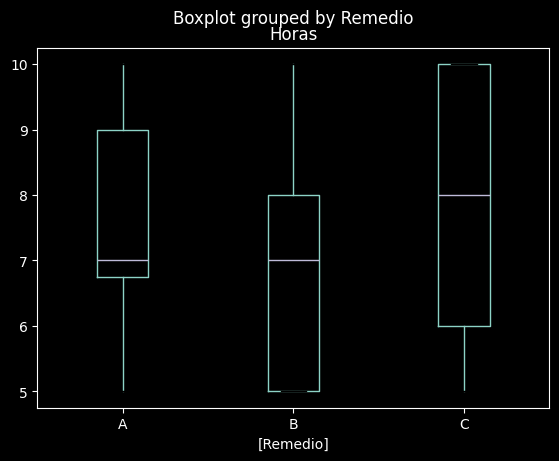

In [3]:
# Boxplot agrupando os dados pelo remédio
tratamento.boxplot(by='Remedio', grid=False);

In [4]:
# Criação do modelo de regressão linear e execução do teste
modelo1 = ols('Horas ~ Remedio', data=tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)

# Observar valor de p maior que 0,05 (Pr(>F)) Hipótese nula de que não há
# diferença significativa

resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [5]:
# Criação do segundo modelo utilizando mais atributos e execução do teste
modelo2 = ols('Horas ~ Remedio * Sexo', data=tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo2)
#Nenhum valor de P mostra diferença significativa
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B   -0.625 0.7991 -3.081 1.831  False
     A      C    0.375 0.9219 -2.081 2.831  False
     B      C      1.0 0.5689 -1.456 3.456  False
-------------------------------------------------


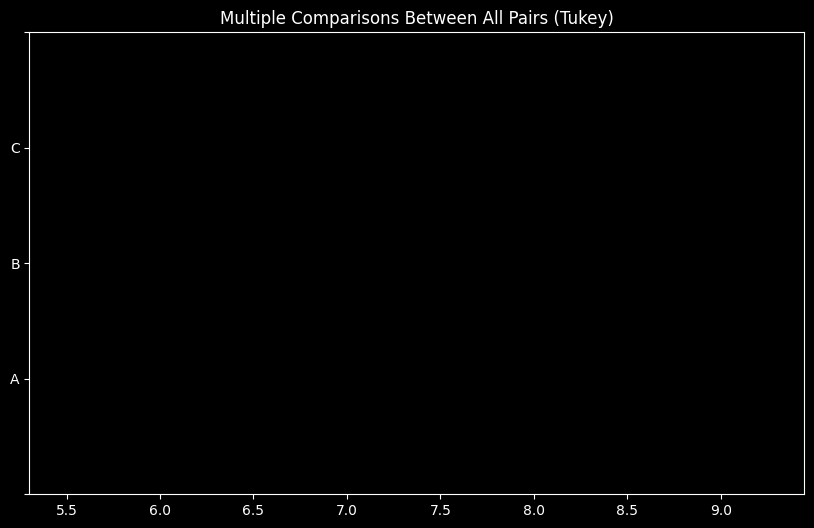

In [6]:
# Se houver diferença o teste de Tukey é executado
# Execução do teste de Tukey e visualização dos gráficos com os resultados
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)
resultado_teste.plot_simultaneous();